In [1]:
import sys
import numpy as np
import pandas as pd
import networkx as nx
import torch

from networkx import Graph
from networkx import average_clustering, clustering, average_node_connectivity

util_path = '../codes'
sys.path.append(util_path)


  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from evaluate import convert_sample_to_space, graph_set_info

In [6]:
all_g = torch.load('rand_data.pt')

In [103]:
# gg = all_g[16]

In [104]:
# gg

In [7]:
node_cnts, edge_cnts, node_features, degrees, dense_edge, connectivities, clustering = graph_set_info(all_g, return_raw=True)

In [13]:
gcpn_distributions = torch.load('graphCPN_random_graph.pt')
graphVAE_distributions = torch.load('graphVAE_randomGraph_distributions.pt')
graphRNN_distributions = torch.load('graphRNN_randomGraph_distributions.pt')
UL_GAN_distributions = torch.load('UL_GAN_distributions.pt')
UL_GAN_noskipZ_distributions = torch.load('UL_GAN_noskipz_distributions.pt')
UL_VAE_distributions = torch.load('UL_VAE_distributions.pt')
graphAF_distributions = torch.load('graphAF_randomGraph_distributions.pt')
sgd_distributions = torch.load('SGD_randomGraph_distributions.pt')
adjGAN_distributions = torch.load('ADJ_GAN_randomGraph_distributions.pt')

In [146]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

In [202]:
results = {'GCPN': gcpn_distributions, 
          'graphVAE': graphVAE_distributions, 
          'graphRNN': graphRNN_distributions, 
           'SGD': sgd_distributions, 
           'ADJ GAN': adjGAN_distributions,
           'graphAF':graphAF_distributions,
          'ULVAE': UL_VAE_distributions,
          'ULGAN (NS)': UL_GAN_noskipZ_distributions,
          'ULGAN': UL_GAN_distributions,
          }

/tmp/ipykernel_333426/2722593623.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], fontsize=16, color='black')
/tmp/ipykernel_333426/2722593623.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 2, 4, 6, 8, 10], fontsize=16, color='black')


[Text(0, 0.0, '0'),
 Text(0, 2.0, '2'),
 Text(0, 4.0, '4'),
 Text(0, 6.0, '6'),
 Text(0, 8.0, '8'),
 Text(0, 10.0, '10')]

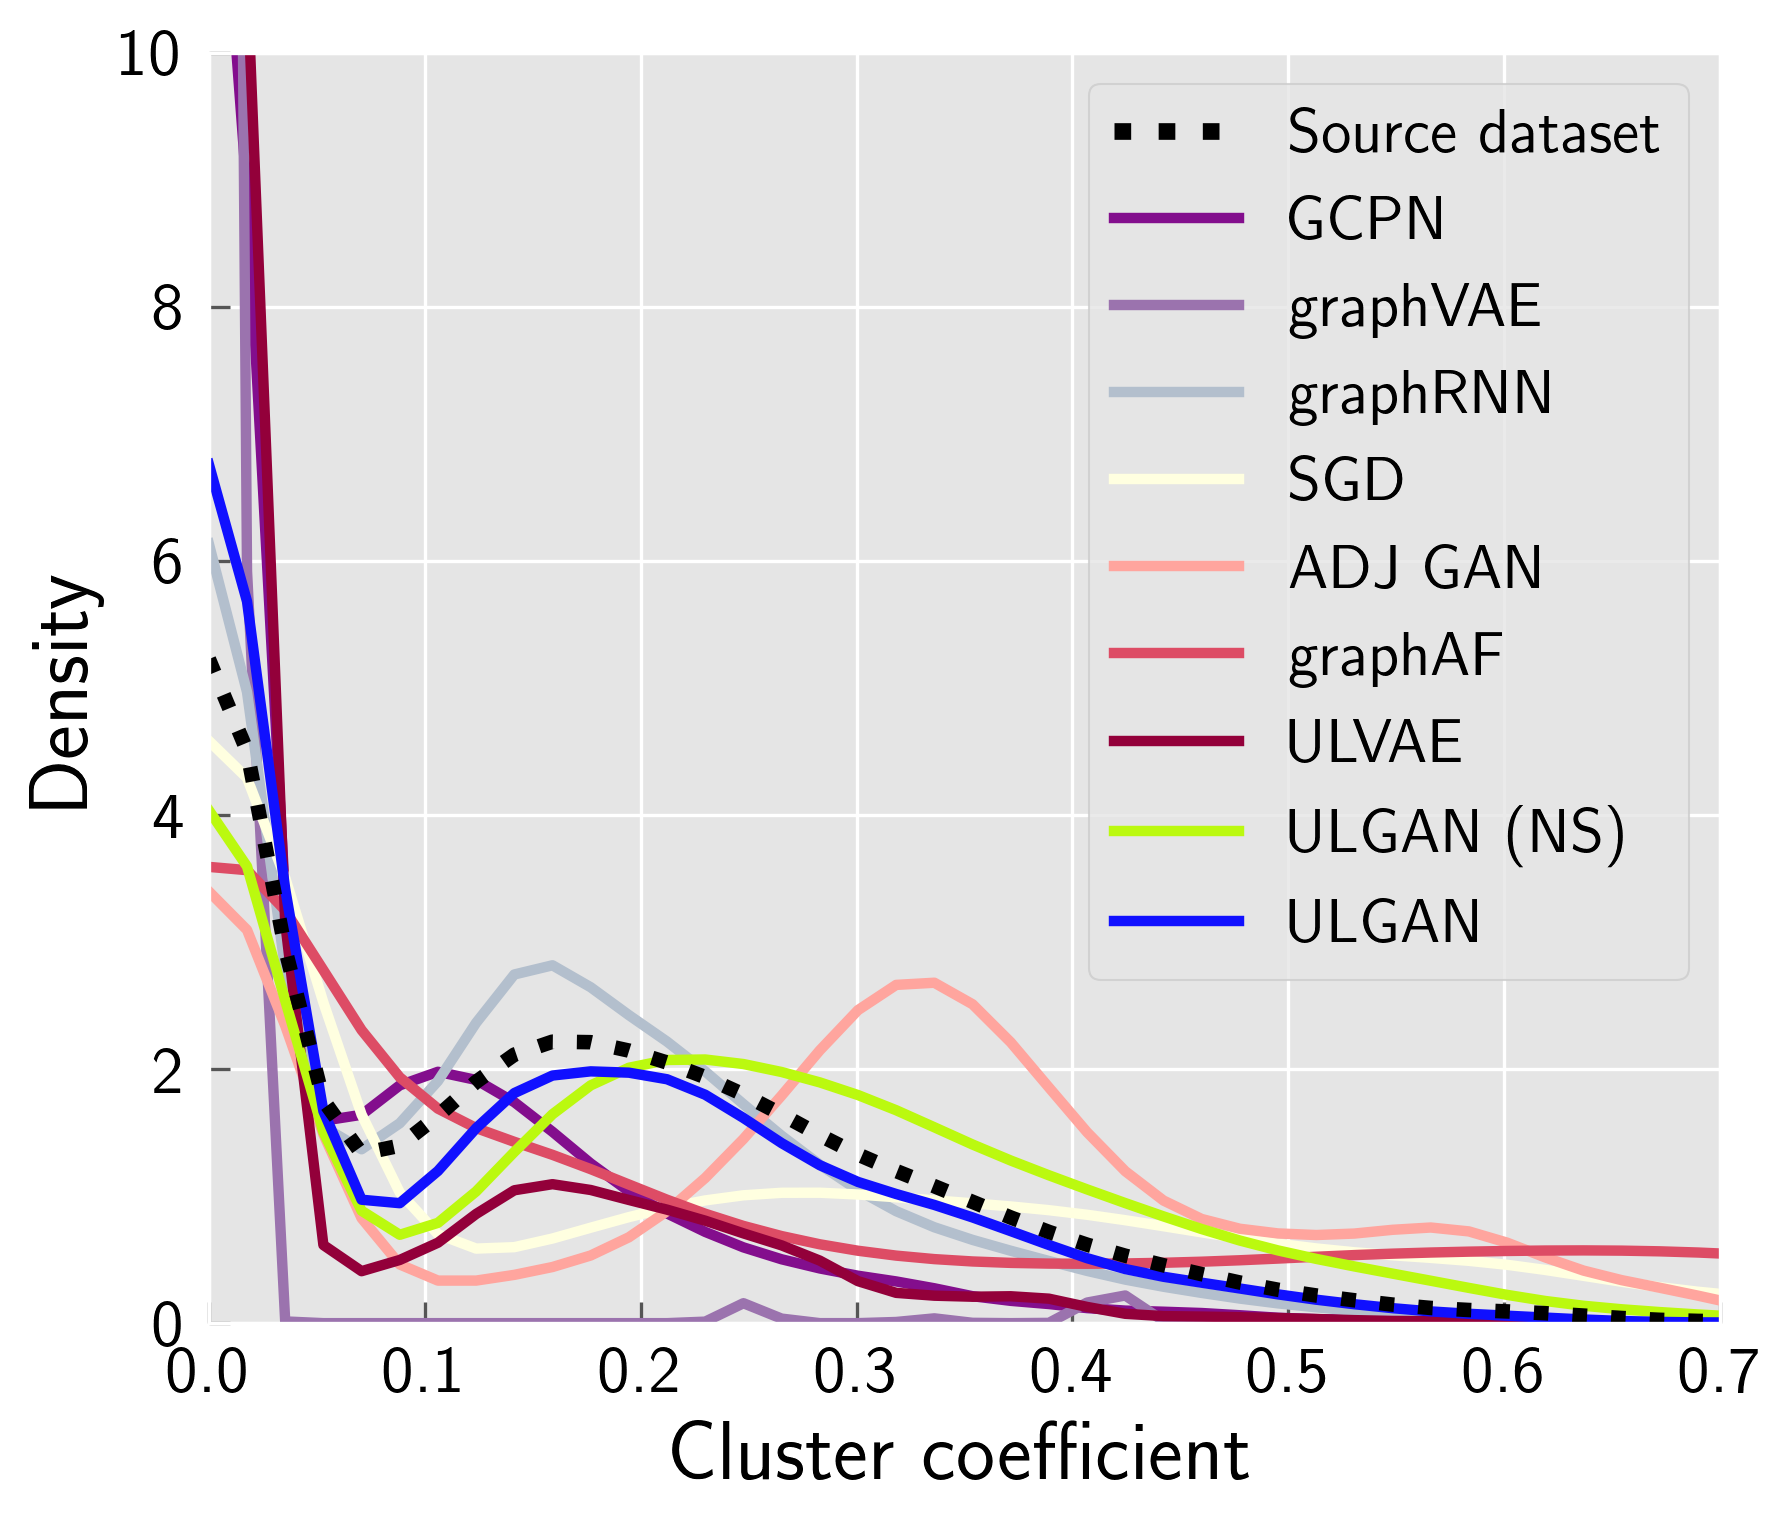

In [204]:
fsize = 15
tsize = 18
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 0.8
lhandle = 2.0

plt.style.use('ggplot')
# plt.style.use('default')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

ref_samples = clustering

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import matplotlib.cm as mplcm
import matplotlib.colors as colors

NUM_COLORS = len(results) + 1

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)


density = stats.gaussian_kde(ref_samples, 0.2)
fig, ax = plt.subplots(figsize=(6.5, 5.5), dpi=300)

ax.set_prop_cycle(color=['black'] + ['#830e8d', '#9b73ae', '#b3bfcd', '#ffffe0', '#ffa59e', '#dd4c65', '#93003a'] + ['BBF90F', '1010FF'])
# ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

import matplotlib.pyplot as plt
x = np.linspace(np.min(ref_samples), np.max(ref_samples), 50)
# ax.plot(x, density(x), linewidth=3.0, linestyle=(0, (3, 1, 1, 1))) #densely dashdotted.
ax.plot([], [], linewidth=4.0, linestyle=':') #densely dashdotted.
for z, test_samples in results.items():
    density_test = stats.gaussian_kde(test_samples[-1], 0.2)
    ax.plot(x, density_test(x), linewidth=2.5)
ax.legend(['Source dataset', ] + list(results.keys()), fontsize=15, fancybox=True)
# ax.set_title('Clustering coefficient', fontsize=15)
ax.plot(x, density(x), linewidth=3.5, linestyle=':', color='black') #densely dashdotted.
ax.set_ylim(0, 10)
ax.set_xlim(0, 0.7)
ax.set_ylabel("Density", fontsize=20, color='black')
ax.set_xlabel("Cluster coefficient", fontsize=20, color='black')
ax.set_xticklabels([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], fontsize=16, color='black')
ax.set_yticklabels([0, 2, 4, 6, 8, 10], fontsize=16, color='black')
# ax.grid()

/tmp/ipykernel_333426/3234642542.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([1.0, 1.5, 2.0, 2.5, 3.0, 3.5], fontsize=16, color='black')
/tmp/ipykernel_333426/3234642542.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0], fontsize=16, color='black')


[Text(0, 0.0, '0'),
 Text(0, 0.5, '0.5'),
 Text(0, 1.0, '1.0'),
 Text(0, 1.5, '1.5'),
 Text(0, 2.0, '2.0'),
 Text(0, 2.5, '2.5'),
 Text(0, 3.0, '3.0')]

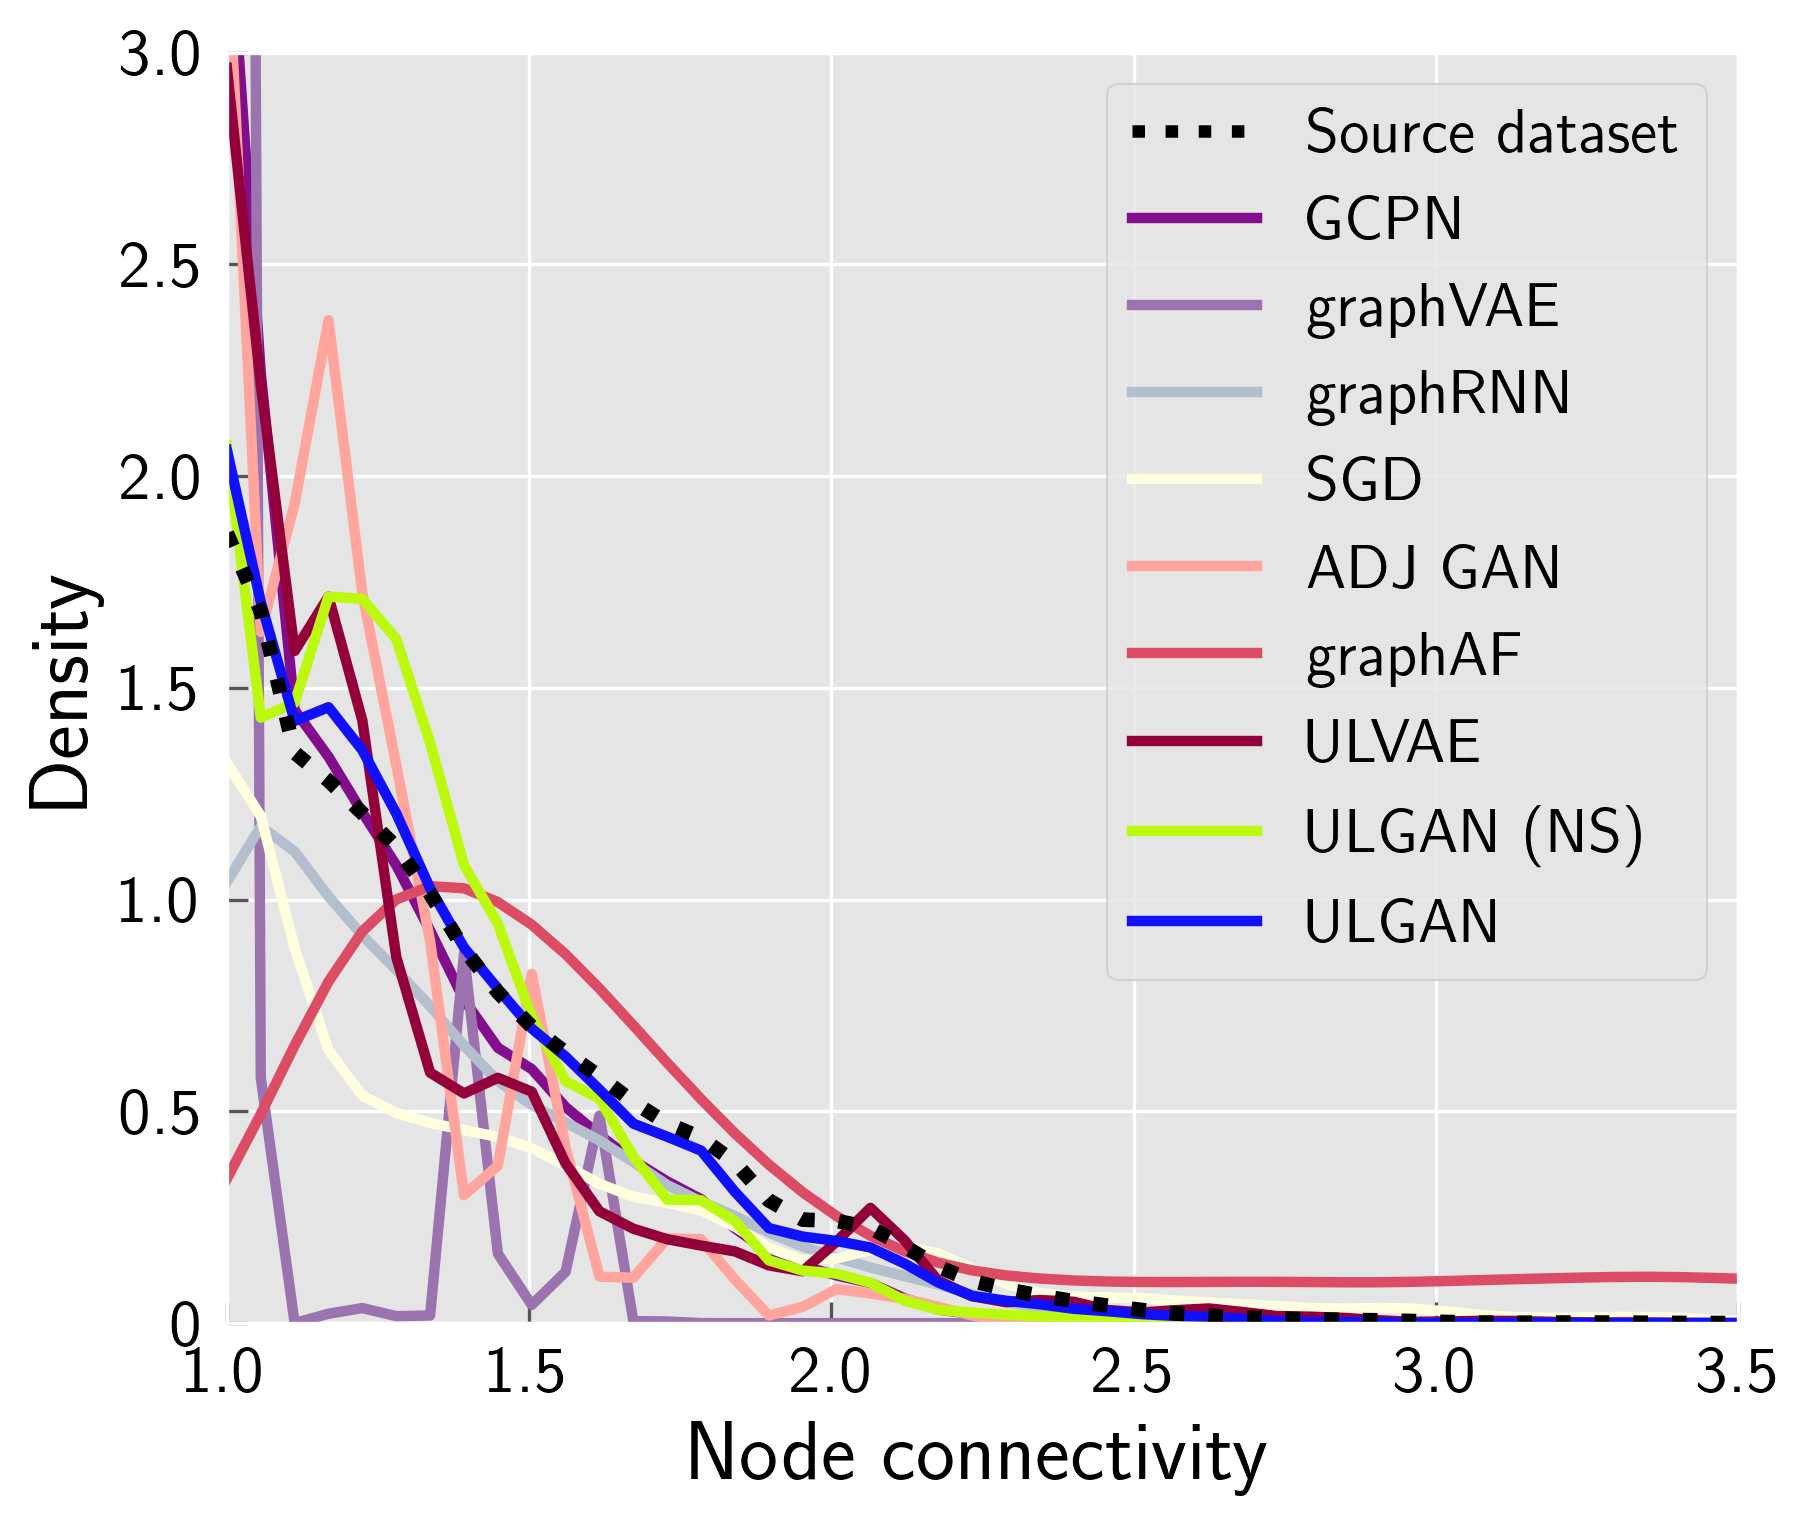

In [205]:
ref_samples = connectivities

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import matplotlib.cm as mplcm
import matplotlib.colors as colors

NUM_COLORS = len(results) + 1

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)


density = stats.gaussian_kde(ref_samples, 0.15)
fig, ax = plt.subplots(figsize=(6.5, 5.5), dpi=300)

# ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# ax.set_prop_cycle(color=['black','#00429d', '#4771b2', '#73a2c6', '#a5d5d8', '#ffffe0', '#ffbcaf', '#f4777f', '#cf3759', '#93003a'])
ax.set_prop_cycle(color=['black'] + ['#830e8d', '#9b73ae', '#b3bfcd', '#ffffe0', '#ffa59e', '#dd4c65', '#93003a'] + ['BBF90F', '1010FF'])

import matplotlib.pyplot as plt
x = np.linspace(np.min(ref_samples), np.max(ref_samples), 50)
ax.plot([], [], linewidth=3.0, linestyle=':') #densely dashdotted.
for z, test_samples in results.items():
    density_test = stats.gaussian_kde(test_samples[-2], 0.15)
    ax.plot(x, density_test(x), linewidth=2.5)
ax.legend(['Source dataset', ] + list(results.keys()), fontsize=15)
ax.plot(x, density(x), linewidth=3.5, linestyle=':', color='black') #densely dashdotted.
# ax.set_title('Clustering coefficient', fontsize=15)
ax.set_ylim(0, 3)
ax.set_xlim(1, 3.5)
ax.set_ylabel("Density", fontsize=20, color='black')
ax.set_xlabel("Node connectivity", fontsize=20, color='black')
ax.set_xticklabels([1.0, 1.5, 2.0, 2.5, 3.0, 3.5], fontsize=16, color='black')
ax.set_yticklabels([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0], fontsize=16, color='black')

# plt.grid()

/tmp/ipykernel_333426/613725827.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55], fontsize=16, color='black')
/tmp/ipykernel_333426/613725827.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 0, 2, 4, 6, 8, 10], fontsize=16, color='black')


[Text(0, -2.0, ''),
 Text(0, 0.0, '0'),
 Text(0, 2.0, '2'),
 Text(0, 4.0, '4'),
 Text(0, 6.0, '6'),
 Text(0, 8.0, '8'),
 Text(0, 10.0, '10'),
 Text(0, 12.0, '')]

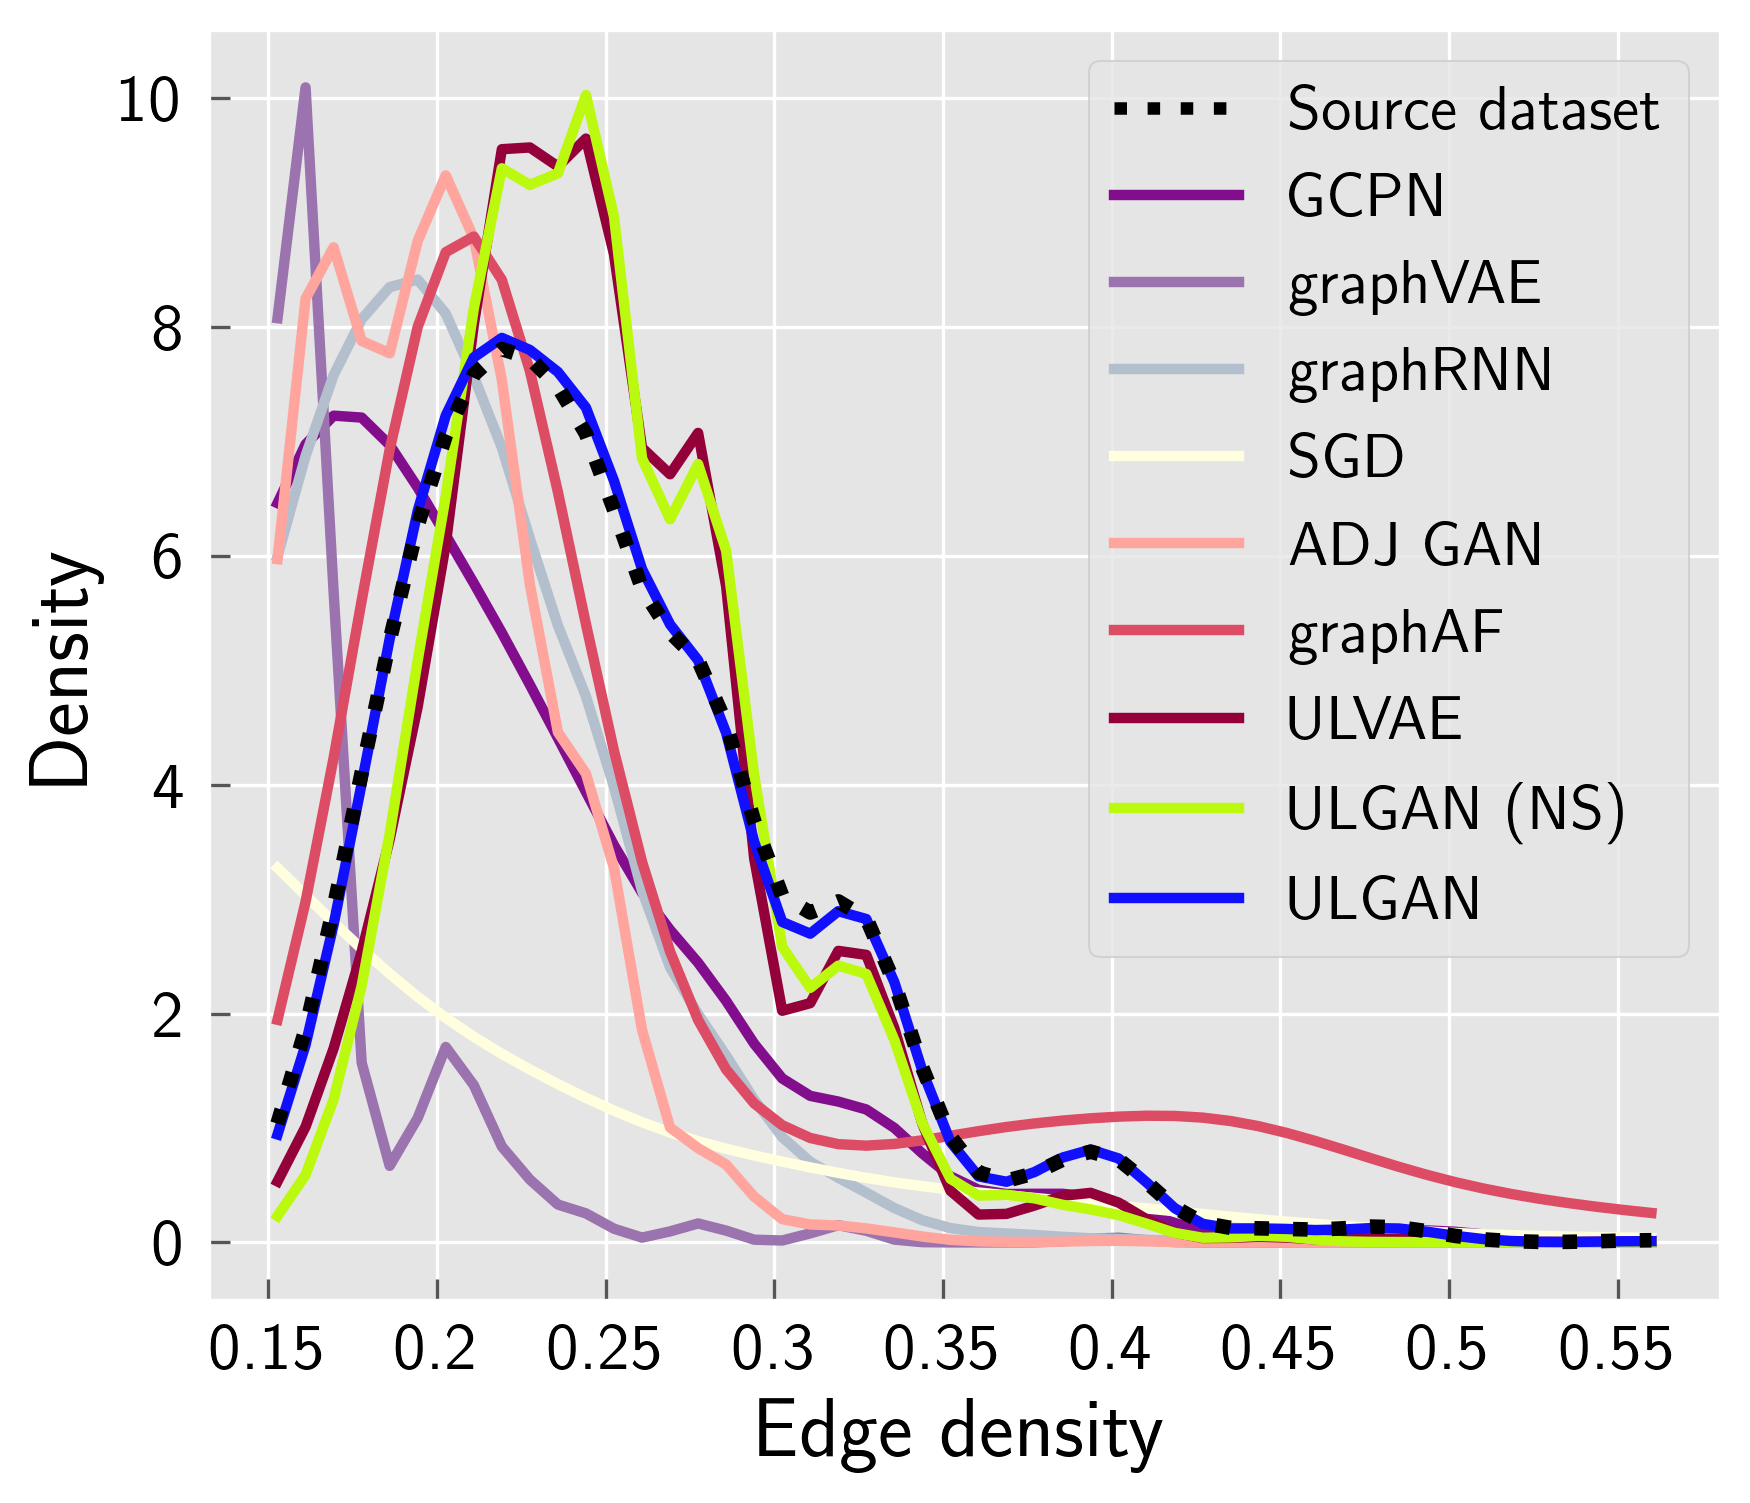

In [206]:
ref_samples = dense_edge

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import matplotlib.cm as mplcm
import matplotlib.colors as colors

NUM_COLORS = len(results) + 1

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)


density = stats.gaussian_kde(ref_samples, 0.25)
fig, ax = plt.subplots(figsize=(6.5, 5.5), dpi=300)

# ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
ax.set_prop_cycle(color=['black'] + ['#830e8d', '#9b73ae', '#b3bfcd', '#ffffe0', '#ffa59e', '#dd4c65', '#93003a'] + ['BBF90F', '1010FF'])

import matplotlib.pyplot as plt
x = np.linspace(np.min(ref_samples), np.max(ref_samples), 50)
ax.plot([], [], linewidth=3.0, linestyle=':') #densely dashdotted.
for z, test_samples in results.items():
    density_test = stats.gaussian_kde(test_samples[-3], 0.25)
    ax.plot(x, density_test(x), linewidth=2.5)
ax.legend(['Source dataset', ] + list(results.keys()), fontsize=15)
ax.plot(x, density(x), linewidth=3.5, linestyle=':', color='black') #densely dashdotted.
# ax.set_title('Clustering coefficient', fontsize=15)
# ax.set_ylim(0, 3)
# ax.set_xlim(1, 3.5)
ax.set_ylabel("Density", fontsize=20, color='black')
ax.set_xlabel("Edge density", fontsize=20, color='black')
ax.set_xticklabels(['', 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55], fontsize=16, color='black')
ax.set_yticklabels(['', 0, 2, 4, 6, 8, 10], fontsize=16, color='black')

# plt.grid()

/tmp/ipykernel_333426/2354782732.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=16, color='black')
/tmp/ipykernel_333426/2354782732.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 0, 1, 2, 3, 4, 5, 6], fontsize=16, color='black')


[Text(0, -1.0, ''),
 Text(0, 0.0, '0'),
 Text(0, 1.0, '1'),
 Text(0, 2.0, '2'),
 Text(0, 3.0, '3'),
 Text(0, 4.0, '4'),
 Text(0, 5.0, '5'),
 Text(0, 6.0, '6'),
 Text(0, 7.0, '')]

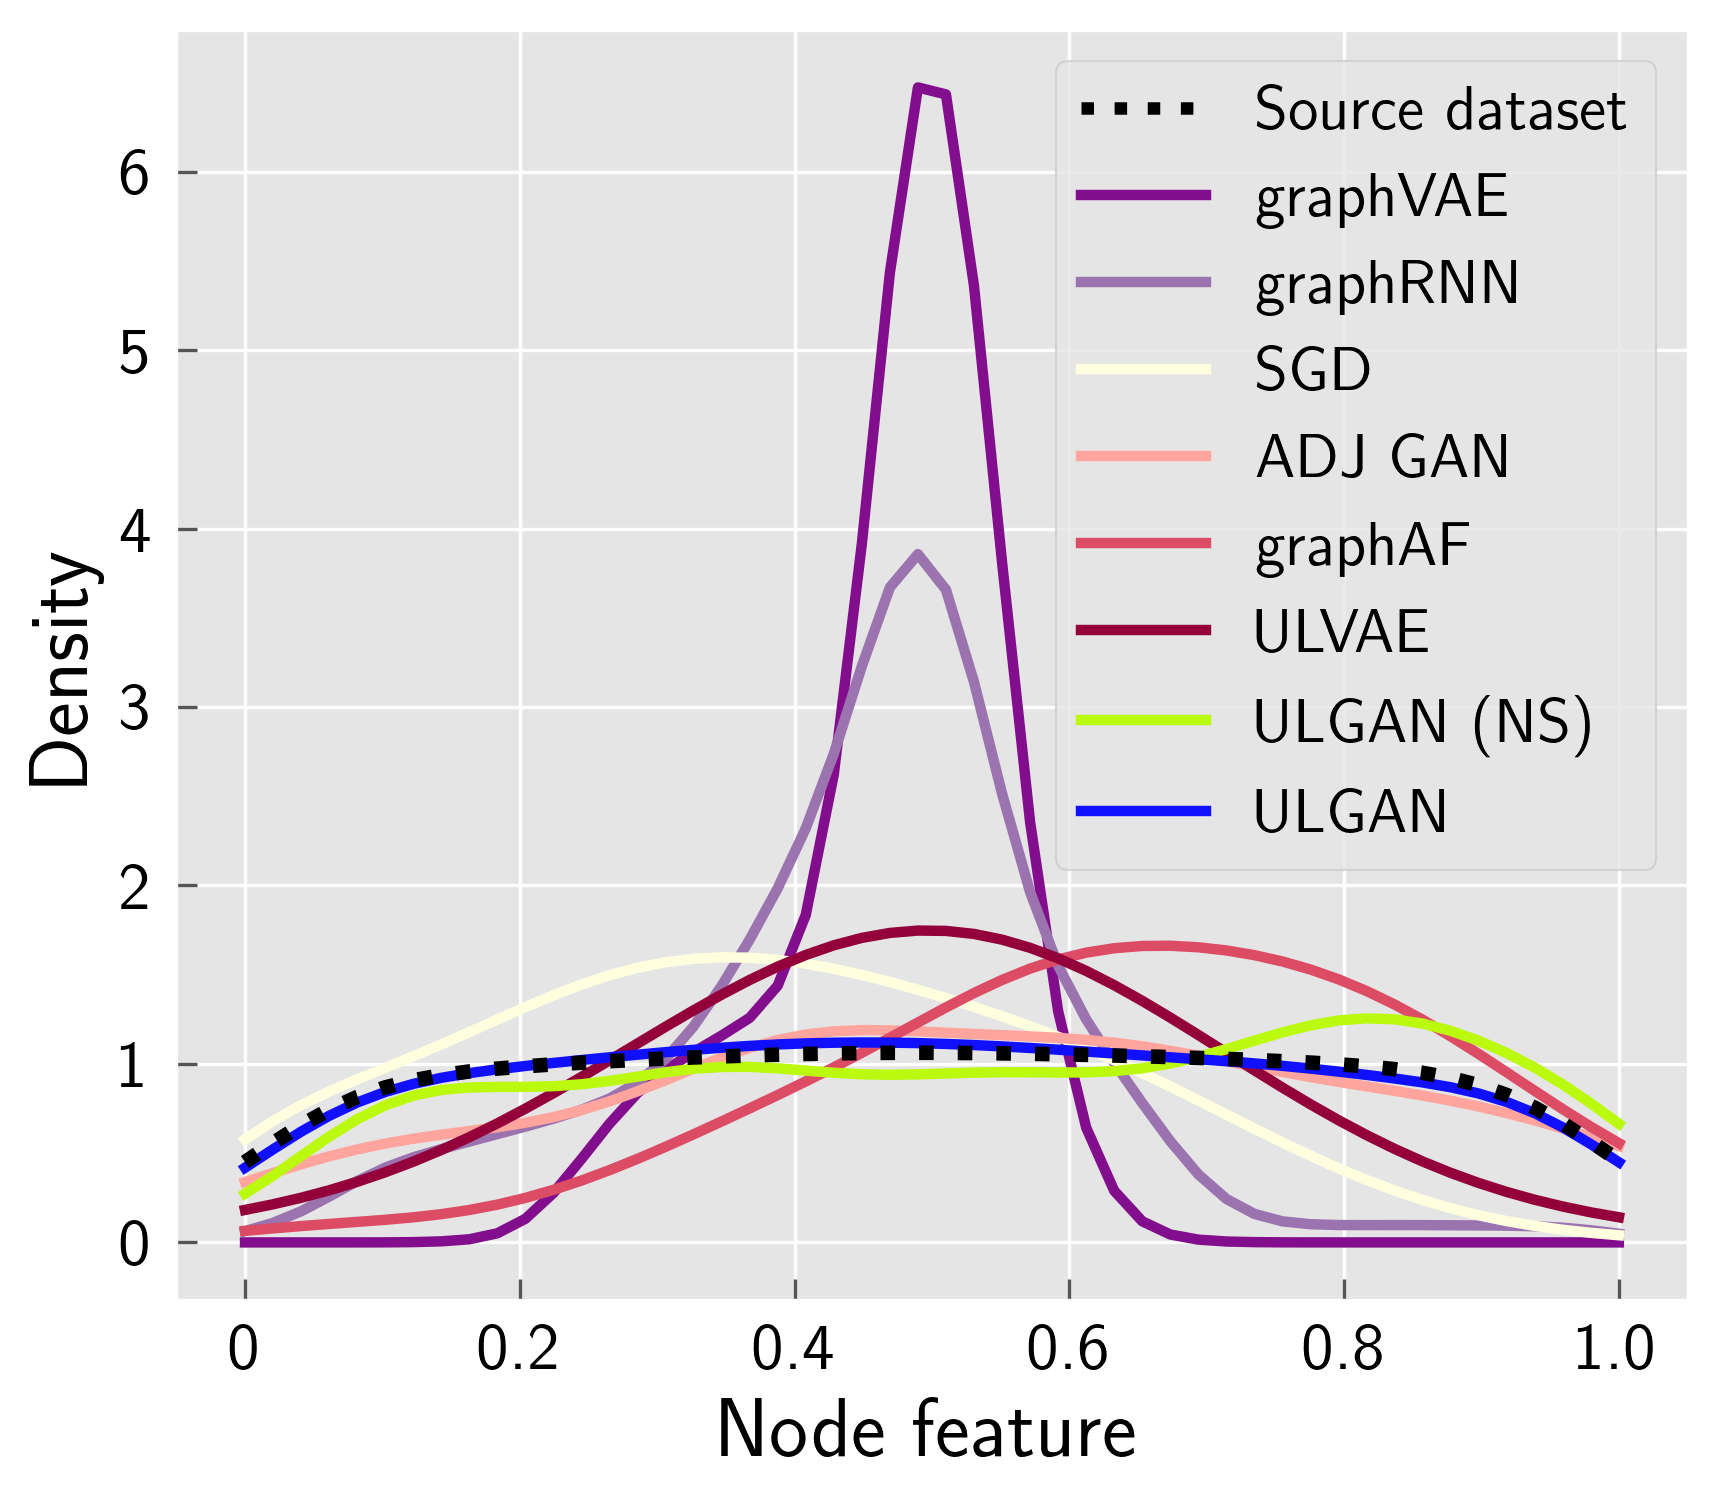

In [207]:
ref_samples = np.concatenate([node_features[:, 0], node_features[:, 1]])

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import matplotlib.cm as mplcm
import matplotlib.colors as colors

NUM_COLORS = len(results) + 1

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)


density = stats.gaussian_kde(ref_samples, 0.25)
fig, ax = plt.subplots(figsize=(6.5, 5.5), dpi=300)

# ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# ax.set_prop_cycle(color=['black'] + ['#00429d', '#93c4d2','#f0ffe0', '#ffa59e', '#dd4c65', '#93003a'] + ['BBF90F', '9A0EEA'])
ax.set_prop_cycle(color=['black'] + ['#830e8d', '#9b73ae', '#ffffe0', '#ffa59e', '#dd4c65', '#93003a'] + ['BBF90F', '1010FF'])

use_legend = ['Source dataset']
import matplotlib.pyplot as plt
x = np.linspace(np.min(ref_samples), np.max(ref_samples), 50)
ax.plot([], [], linewidth=3.0, linestyle=':') #densely dashdotted.
for z, test_samples in results.items():
    try:
        density_test = stats.gaussian_kde(np.concatenate([test_samples[2][:, 0], test_samples[2][:, 1]]), 0.25)
        ax.plot(x, density_test(x), linewidth=2.5)
        use_legend.append(z)
    except:
        pass
    
ax.plot(x, density(x), linewidth=3.5, linestyle=':', color='black') #densely dashdotted.

ax.legend(use_legend, fontsize=15)
# ax.set_title('Clustering coefficient', fontsize=15)
# ax.set_ylim(0, 3)
# ax.set_xlim(0.5, 1.0)
ax.set_ylabel("Density", fontsize=20, color='black')
ax.set_xlabel("Node feature", fontsize=20, color='black')
ax.set_xticklabels(['', 0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=16, color='black')
ax.set_yticklabels(['', 0, 1, 2, 3, 4, 5, 6], fontsize=16, color='black')

# plt.grid()